In [220]:
#load libraries

import pandas as pd 
import numpy as np 
import os
import scprep

#load single cell raw data

#load file using filepath, this is set up so that as long as your single cell raw data is in the same folder it will automatically work
current_folder = 'bodmer_ls180_colo678/' #current folder pathname + filepath of text file of single cell data

#load file into python
bodmer_file = scprep.io.load_mtx(current_folder+"matrix.mtx", cell_names=current_folder+"barcodes.tsv", gene_names=current_folder+"genes.tsv")

GMMchi_scs_pipeline initiating...
removing barcodes that are highly likely to be doublets or empty...
93.10% barcodes were likely unused or empty...
3442 barcodes left...


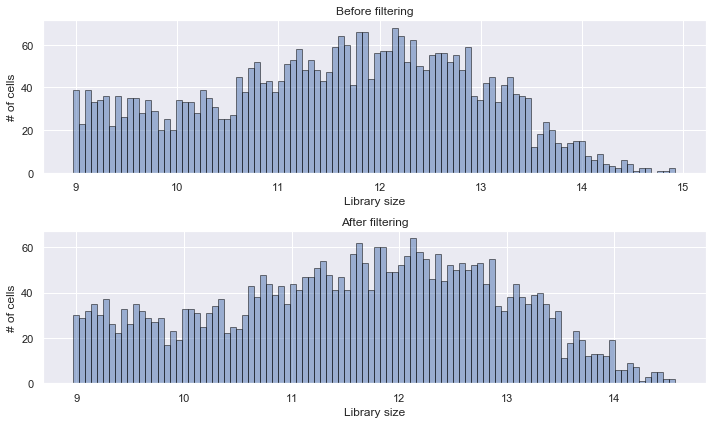

measuring library complexity for each barcode...


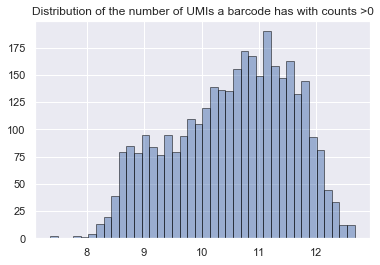

removing barcodes with low library complexity...


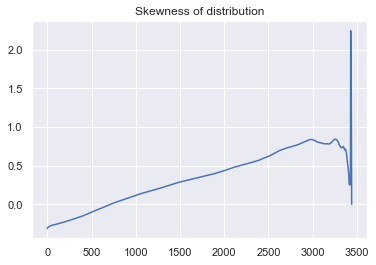

Intercept of skewness crossing 0 is: 714 or 2^9.56
2726 barcodes left...
removing barcodes with housekeeping genes under cutoff...


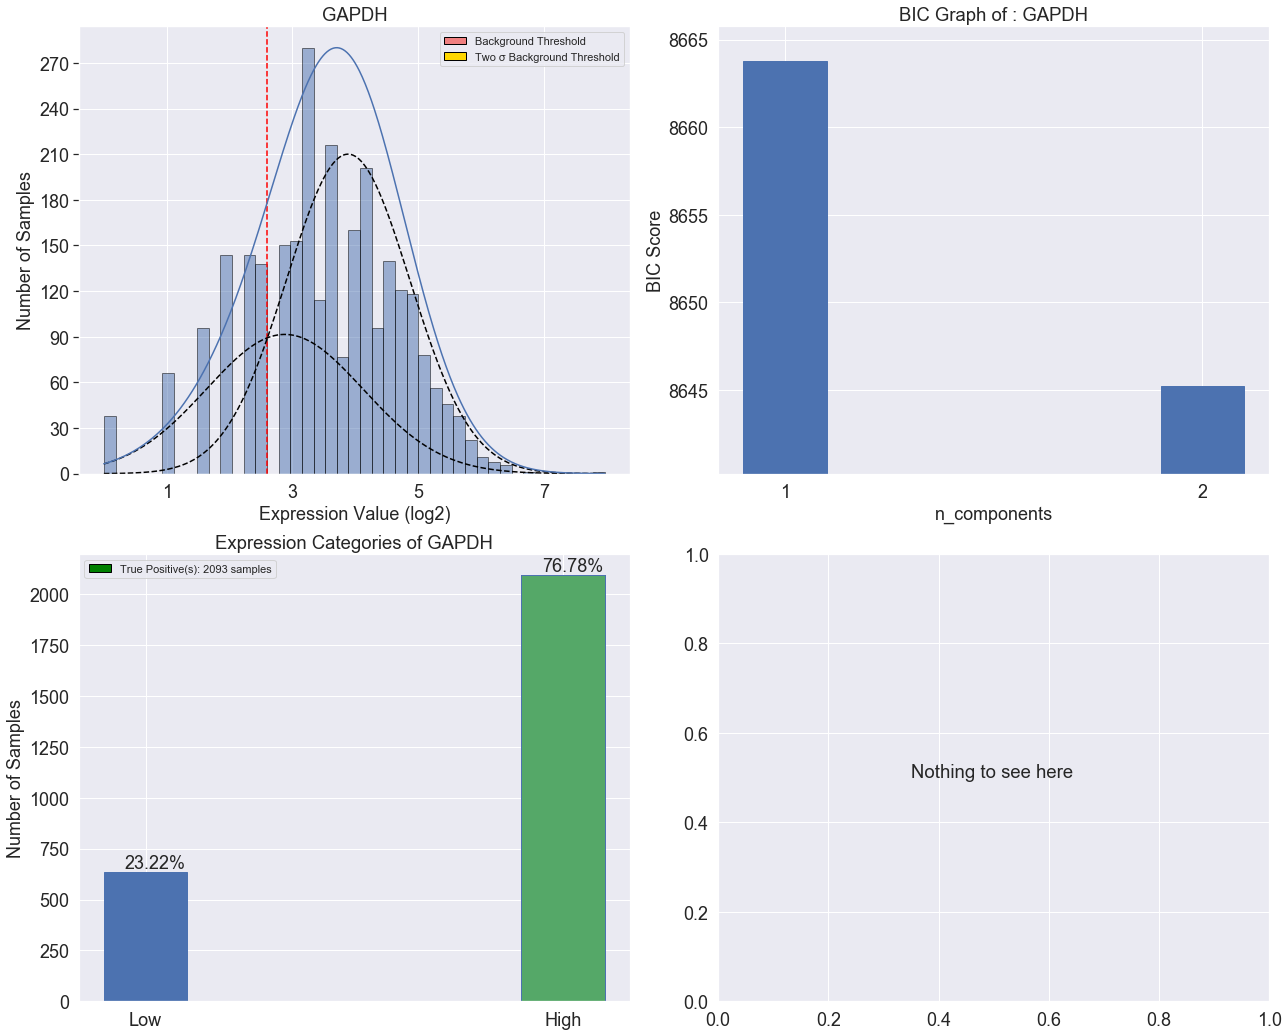

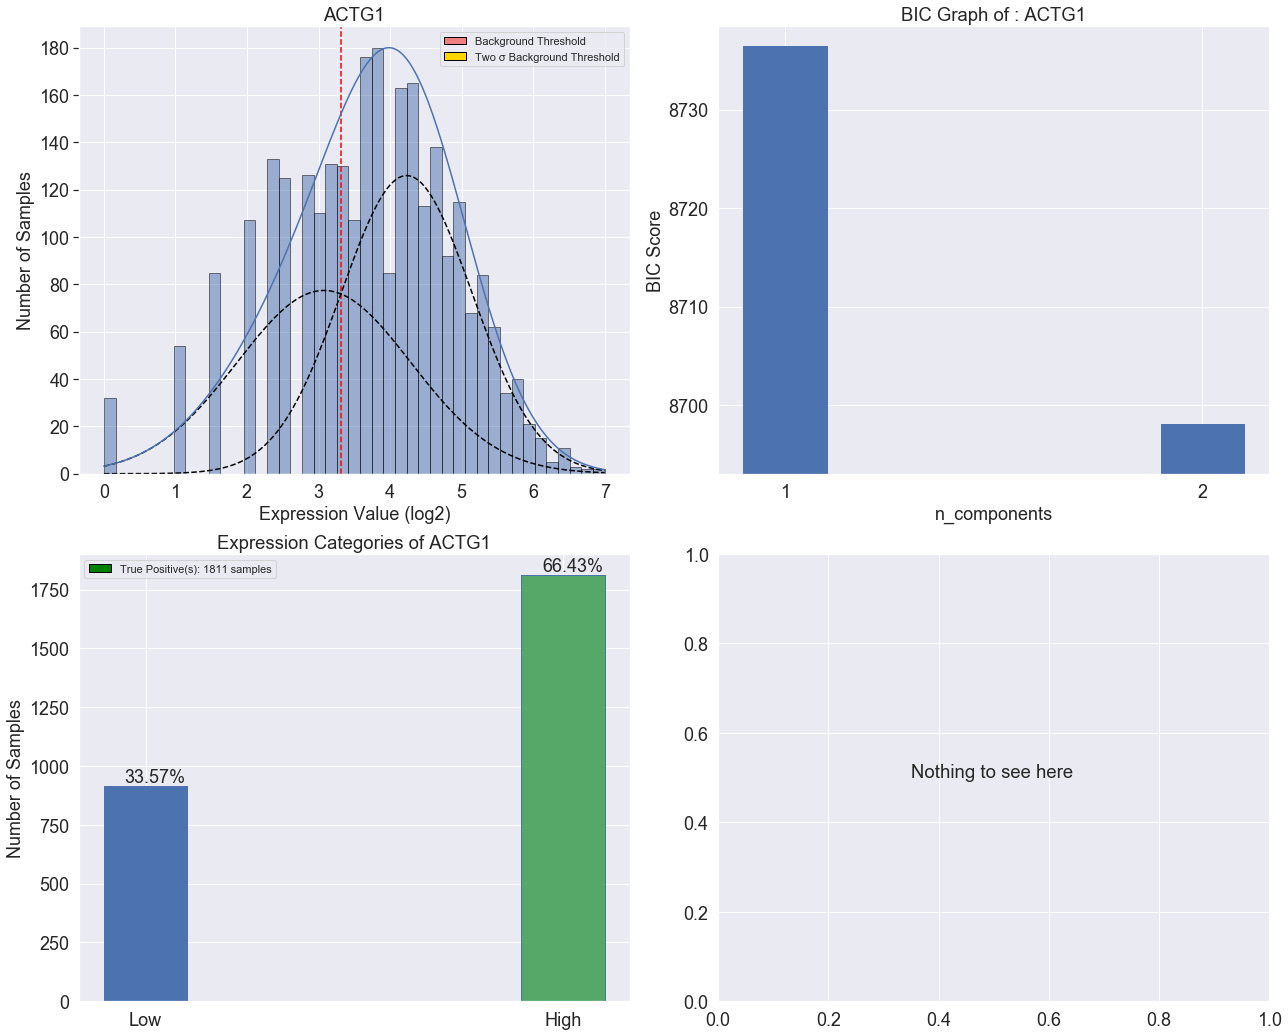

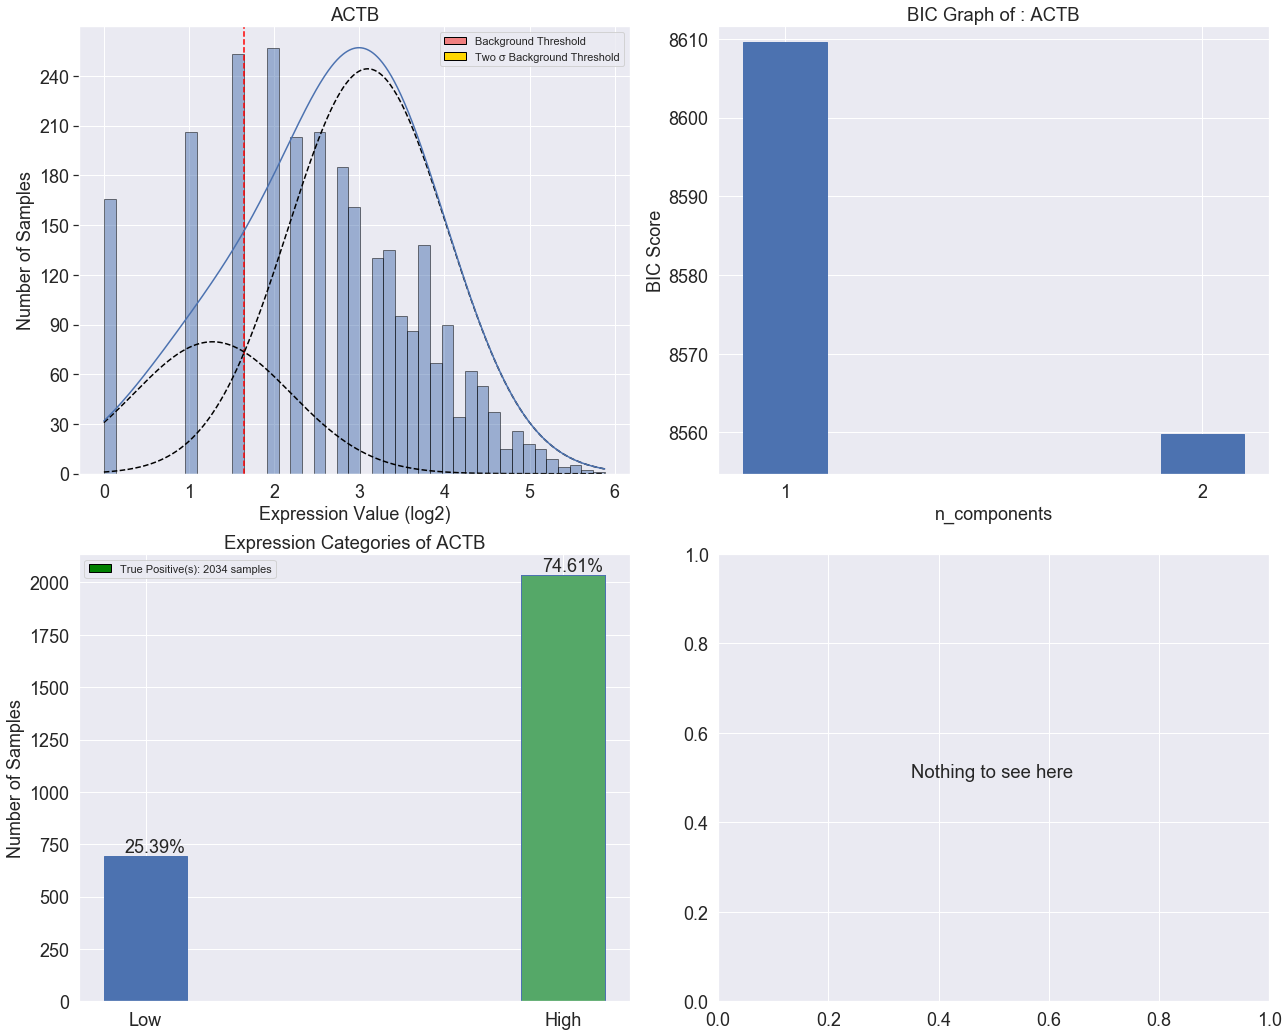


1487 barcodes left...
removing barcodes with mitochondrial genes that are in the top 5 percentile...


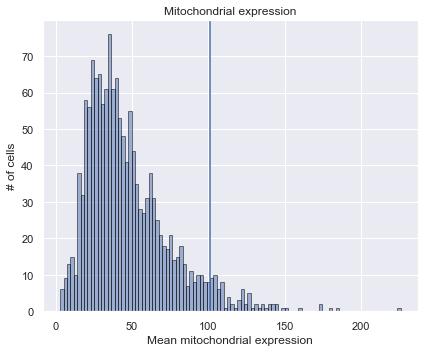

1412 barcodes left...
normalizing input data...
GMMchi_scs_pipeline finished. Done!


In [321]:
#run through the raw data through our post processing pipeline
%run GMM_single_cell_pipeline_final.ipynb #load postprocessing pipeline library

input_data = GMMchi_scs_pipeline(bodmer_file)

In [322]:
%run GMM_single_cell_pipeline_final.ipynb #load postprocessing pipeline library

#map the postprocessed data with UMAP (dimensionality reduction technique)
UMAP_df = UMAP_graph(input_data)

UMAP(random_state=42, verbose=True)
Construct fuzzy simplicial set
Thu Mar 25 14:40:44 2021 Finding Nearest Neighbors
Thu Mar 25 14:40:44 2021 Finished Nearest Neighbor Search
Thu Mar 25 14:40:44 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Mar 25 14:40:47 2021 Finished embedding
UMAP done! Time elapsed: 8.469839096069336 seconds


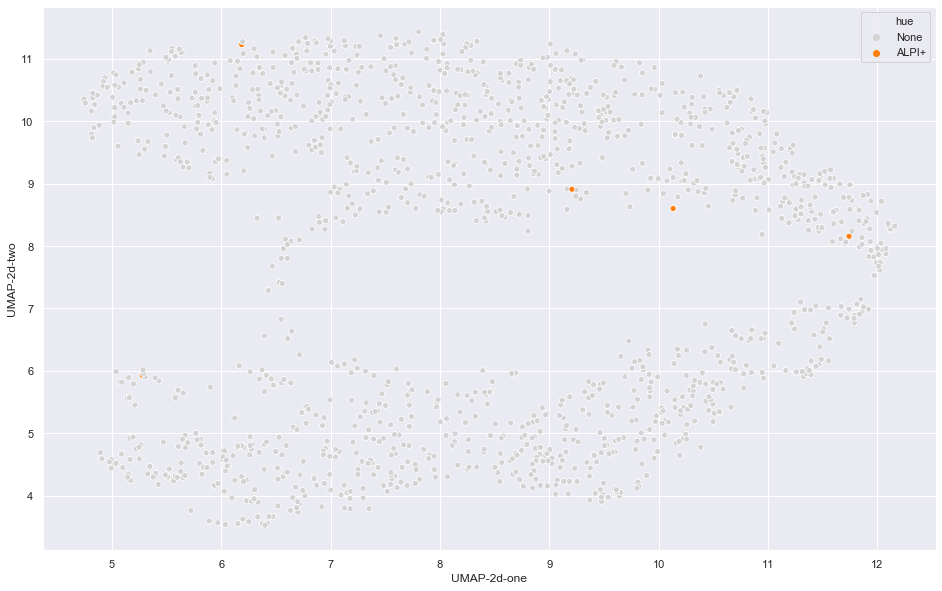

In [371]:
#label your graphs 
%run GMM_single_cell_pipeline_final.ipynb


#use this if you just want the cells to be colored if the cell is expressing a gene above threshold 
Label_graph(input_data, UMAP_df, label_list=['ALPI']) 

<Figure size 1152x720 with 0 Axes>

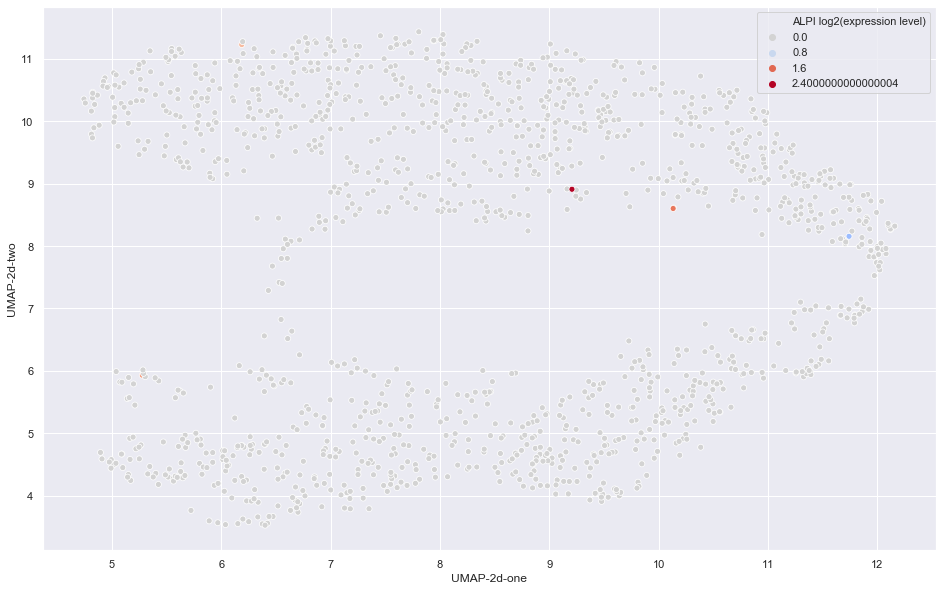

In [374]:
# use this if you want the cells to be colored in according to the level of expression of the gene
Label_graph(input_data, UMAP_df, label_list=['ALPI'], boolean_visualization=False) 

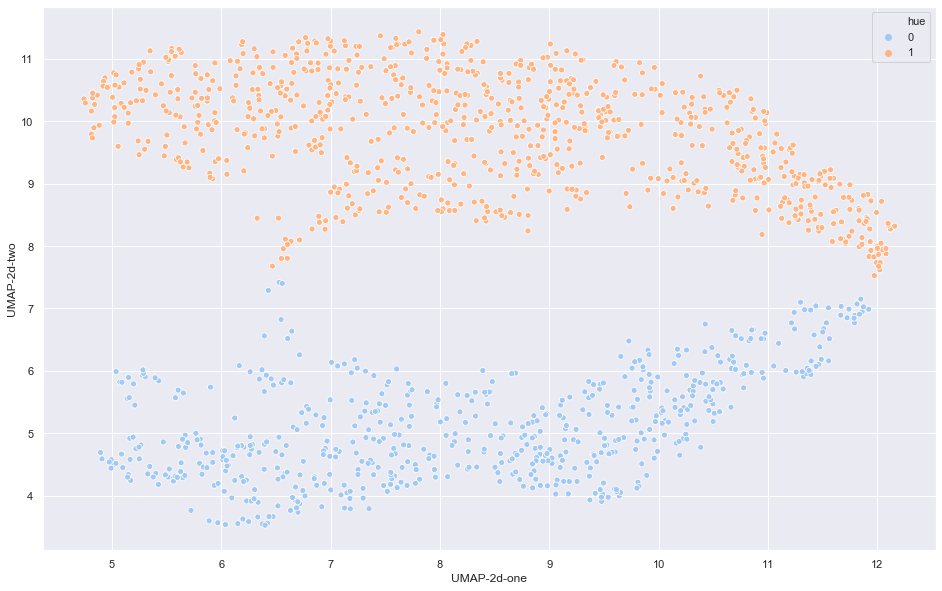

In [341]:
from sklearn.cluster import KMeans
#kmeans clustering to seperate clusters

clusters = 2 #define the number of clusters you assume your population of cells have

kmeans = KMeans(n_clusters=clusters, random_state=42).fit(UMAP_df[['UMAP-2d-one','UMAP-2d-two']])
UMAP_df['hue'] = kmeans.labels_


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="UMAP-2d-one", y="UMAP-2d-two",
    palette=sns.color_palette("pastel", n_colors = clusters),
    hue='hue',
    data=UMAP_df,
    legend='full',
    alpha=1
);